# Global Economy Indicators Analysis

## Project Overview
This project analyzes the National Accounts Main Aggregates Database from the United Nations, containing economic indicators for 200+ countries from 1970 onwards. The dataset has 10,513 rows and 26 features covering GDP, manufacturing, agriculture, trade, and government expenditure.

## Project Workflow
1. **Excel:** Initial cleaning, formatting, and pivot table analysis
2. **SQL:** Missing value identification, correlation analysis, and data filtering
3. **Python:** Advanced analytics, feature engineering, and ML preparation (this notebook)

## Analysis Goals
- Understand relationships between GDP and other economic sectors
- Identify trends across countries and time
- Create informative visualizations
- Prepare data for predictive modeling

## Data Source
United Nations Statistics Division's National Accounts Main Aggregates Database

In [2]:
# Global Economy Indicators Analysis
# ===================================
# This script processes and analyzes economic indicators from countries worldwide
# to explore relationships between GDP and other economic factors.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

In [3]:
# Set plotting style and suppress warnings for cleaner output
plt.style.use('seaborn-v0_8-whitegrid')
warnings.filterwarnings('ignore')

In [4]:
# 1. Data Loading
# --------------
print("Loading and examining the dataset...")
# Load the complete dataset from Excel
df = pd.read_excel('Global_Economy.xlsx').copy()
df.head()

Loading and examining the dataset...


,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811,127747843,1731454254,83917200.0,226387091.0,1766527525,1731435587
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164,133754097,1812857077,87860382.0,237019196.0,1850121913,1812837521
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865,121582672,1647917912,79864525.0,215477287.0,1683947905,1647900178
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793,125630236,1702734673,82528885.0,222624293.0,1739998153,1702716294
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790,152119162,2061751510,99918604.0,269525910.0,2106420227,2061729287


In [5]:
# Display basic information about the dataset
print(f"Dataset dimensions: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nColumn names:")
print(df.columns.tolist())

Dataset dimensions: 10512 rows, 26 columns

Column names:
['CountryID', 'Country', 'Year', 'AMA exchange rate', 'IMF based exchange rate', 'Population', 'Currency', 'Per capita GNI', 'Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Changes in inventories', 'Construction (ISIC F)', 'Exports of goods and services', 'Final consumption expenditure', 'General government final consumption expenditure', 'Gross capital formation', 'Gross fixed capital formation (including Acquisitions less disposals of valuables)', 'Household consumption expenditure (including Non-profit institutions serving households)', 'Imports of goods and services', 'Manufacturing (ISIC D)', 'Mining, Manufacturing, Utilities (ISIC C-E)', 'Other Activities (ISIC J-P)', 'Total Value Added', 'Transport, storage and communication (ISIC I)', 'Wholesale, retail trade, restaurants and hotels (ISIC G-H)', 'Gross National Income(GNI) in USD', 'Gross Domestic Product (GDP)']


In [6]:
# 2. Data Cleaning and Preprocessing
# ---------------------------------
print("\nPerforming data cleaning and preprocessing...")

# Rename columns to remove spaces and special characters for easier handling
df.columns = [col.strip().replace(' ', '_').replace(',', '').replace('(', '').replace(')', '').replace('-', '_') 
              for col in df.columns]
print(df.columns.tolist())
df.head()


Performing data cleaning and preprocessing...
['CountryID', 'Country', 'Year', 'AMA_exchange_rate', 'IMF_based_exchange_rate', 'Population', 'Currency', 'Per_capita_GNI', 'Agriculture_hunting_forestry_fishing_ISIC_A_B', 'Changes_in_inventories', 'Construction_ISIC_F', 'Exports_of_goods_and_services', 'Final_consumption_expenditure', 'General_government_final_consumption_expenditure', 'Gross_capital_formation', 'Gross_fixed_capital_formation_including_Acquisitions_less_disposals_of_valuables', 'Household_consumption_expenditure_including_Non_profit_institutions_serving_households', 'Imports_of_goods_and_services', 'Manufacturing_ISIC_D', 'Mining_Manufacturing_Utilities_ISIC_C_E', 'Other_Activities_ISIC_J_P', 'Total_Value_Added', 'Transport_storage_and_communication_ISIC_I', 'Wholesale_retail_trade_restaurants_and_hotels_ISIC_G_H', 'Gross_National_IncomeGNI_in_USD', 'Gross_Domestic_Product_GDP']


,CountryID,Country,Year,AMA_exchange_rate,IMF_based_exchange_rate,Population,Currency,Per_capita_GNI,Agriculture_hunting_forestry_fishing_ISIC_A_B,Changes_in_inventories,...,Household_consumption_expenditure_including_Non_profit_institutions_serving_households,Imports_of_goods_and_services,Manufacturing_ISIC_D,Mining_Manufacturing_Utilities_ISIC_C_E,Other_Activities_ISIC_J_P,Total_Value_Added,Transport_storage_and_communication_ISIC_I,Wholesale_retail_trade_restaurants_and_hotels_ISIC_G_H,Gross_National_IncomeGNI_in_USD,Gross_Domestic_Product_GDP
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811,127747843,1731454254,83917200.0,226387091.0,1766527525,1731435587
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164,133754097,1812857077,87860382.0,237019196.0,1850121913,1812837521
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865,121582672,1647917912,79864525.0,215477287.0,1683947905,1647900178
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793,125630236,1702734673,82528885.0,222624293.0,1739998153,1702716294
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790,152119162,2061751510,99918604.0,269525910.0,2106420227,2061729287


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percentage], axis=1, 
                         keys=['Missing_Values', 'Percentage'])
print("\nMissing data analysis:")
print(missing_data[missing_data['Missing_Values'] > 0].sort_values('Percentage', ascending=False))


Missing data analysis:
                                                    Missing_Values  Percentage
Changes_in_inventories                                        1841   17.513318
Agriculture_hunting_forestry_fishing_ISIC_A_B                  121    1.151065
General_government_final_consumption_expenditure                52    0.494673
Gross_fixed_capital_formation_including_Acquisi...              52    0.494673
Gross_capital_formation                                         52    0.494673
Household_consumption_expenditure_including_Non...              52    0.494673
Wholesale_retail_trade_restaurants_and_hotels_I...              49    0.466134
Transport_storage_and_communication_ISIC_I                      49    0.466134
Manufacturing_ISIC_D                                            43    0.409056
Imports_of_goods_and_services                                   42    0.399543
Exports_of_goods_and_services                                   21    0.199772


## Handling Missing Values in Global Economy Dataset

Our dataset contains several columns with missing values. We've implemented a tailored approach to handle these missing values appropriately:

### Country-Specific Mean Imputation for Low Missing Rates

For columns with low missing rates (<5%), we use country-specific mean imputation rather than global means. This approach is critical because economic indicators vary dramatically across countries.

In [8]:
# 3. Handle Missing Values
# -----------------------
print("\nHandling missing values...")

# Separate numerical and categorical columns for appropriate imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


Handling missing values...


In [9]:
# Get missing numeric columns
missing_numeric_cols = [col for col in numeric_cols if df[col].isnull().any()]
print("Numeric columns with missing values:", missing_numeric_cols)

# Exclude 'Changes_in_inventories' from regular imputation because of high missing rate
inventory_col = 'Changes_in_inventories'

# Find columns with low missing rates (<5%) excluding inventory column
low_missing_rate_cols = [col for col in missing_numeric_cols 
                        if missing_percentage[col] < 5 
                        and col != inventory_col]

print("Columns to impute with country-specific means:", low_missing_rate_cols)


Numeric columns with missing values: ['Agriculture_hunting_forestry_fishing_ISIC_A_B', 'Changes_in_inventories', 'Exports_of_goods_and_services', 'General_government_final_consumption_expenditure', 'Gross_capital_formation', 'Gross_fixed_capital_formation_including_Acquisitions_less_disposals_of_valuables', 'Household_consumption_expenditure_including_Non_profit_institutions_serving_households', 'Imports_of_goods_and_services', 'Manufacturing_ISIC_D', 'Transport_storage_and_communication_ISIC_I', 'Wholesale_retail_trade_restaurants_and_hotels_ISIC_G_H']
Columns to impute with country-specific means: ['Agriculture_hunting_forestry_fishing_ISIC_A_B', 'Exports_of_goods_and_services', 'General_government_final_consumption_expenditure', 'Gross_capital_formation', 'Gross_fixed_capital_formation_including_Acquisitions_less_disposals_of_valuables', 'Household_consumption_expenditure_including_Non_profit_institutions_serving_households', 'Imports_of_goods_and_services', 'Manufacturing_ISIC_D', 

In [10]:
# Group by country and apply imputation for low missing rate columns
for country in df['Country'].unique():
    # Get the data for this specific country
    country_mask = df['Country'] == country
    
    # Process each column separately for this country
    for col in low_missing_rate_cols:
        # Check if this country has missing values in this column
        if df.loc[country_mask, col].isnull().any():
            # Calculate mean for this country (excluding NaN values)
            country_mean = df.loc[country_mask, col].mean()
            
            # Only impute if we have a valid mean
            if not pd.isna(country_mean):
                # Apply imputation using only this country's mean
                df.loc[country_mask & df[col].isnull(), col] = country_mean
            else:
                # If no valid mean for this country, use global mean
                col_mean = df[col].mean()
                df.loc[country_mask & df[col].isnull(), col] = col_mean
                    
df.isnull().sum()[df.isnull().sum() > 0]

Changes_in_inventories    1841
dtype: int64

### Special Handling for Changes in Inventories (17.5% Missing)

The "Changes_in_inventories" column presents unique challenges with 17.5% missing data. Unlike other columns that can use country-specific mean imputation, inventory changes:

1. Are often sporadic with both positive values (inventory buildup) and negative values (inventory drawdown)
2. Follow temporal patterns related to economic cycles
3. Vary significantly in magnitude across different economic scales

Our two-stage approach:

**Stage 1: Time-Series Interpolation**
For each country, we first attempt to fill gaps using linear interpolation of their existing values over time. This preserves country-specific temporal patterns and economic scale, but requires:
- At least 3 non-missing values for the country
- Non-missing values distributed across different years

**Stage 2: GDP-Based Estimation**
For remaining gaps and countries with no inventory data:
1. We calculate the relationship between inventories and GDP across all countries with data
2. Find the median ratio of inventory changes to GDP (using median reduces impact of outliers)
3. Apply this ratio to each country's GDP to estimate missing inventory values

This approach maintains macroeconomic relationships between variables while handling the high proportion of missing values appropriately.

Note: Some countries may still have NaN values after this process if they have no GDP data or extremely irregular economic patterns.

In [11]:
# Special handling for 'Changes_in_inventories' column
# For this column, we'll use a combination of time series interpolation and GDP-based estimation
if inventory_col in df.columns:
    print(f"\nSpecial handling for {inventory_col} column due to high missing rate...")
    
    # First pass: Linear interpolation within each country's time series
    for country in df['Country'].unique():
        country_mask = df['Country'] == country
        country_years = df.loc[country_mask, 'Year']
        
        # Only attempt interpolation if we have at least some data for this country
        if not df.loc[country_mask, inventory_col].isnull().all() and len(country_years) > 2:
            # Sort by year for proper interpolation
            country_idx = df.loc[country_mask].sort_values('Year').index
            df.loc[country_idx, inventory_col] = df.loc[country_idx, inventory_col].interpolate(method='linear')
    
    # Second pass: For countries with no inventory data, estimate based on GDP ratio
    # Calculate the average ratio of inventory changes to GDP for countries with data
    inventory_gdp_ratios = df[df[inventory_col].notnull()][['Gross_Domestic_Product_GDP', inventory_col]]
    inventory_gdp_ratios = inventory_gdp_ratios[inventory_gdp_ratios['Gross_Domestic_Product_GDP'] > 0]
    avg_ratio = (inventory_gdp_ratios[inventory_col] / inventory_gdp_ratios['Gross_Domestic_Product_GDP']).median()
    
    # Apply this ratio to estimate inventory changes where still missing
    missing_mask = df[inventory_col].isnull() & df['Gross_Domestic_Product_GDP'].notnull()
    df.loc[missing_mask, inventory_col] = df.loc[missing_mask, 'Gross_Domestic_Product_GDP'] * avg_ratio


Special handling for Changes_in_inventories column due to high missing rate...


## data visualization and exploration section

In [12]:
# Define the target GDP column name
target_variable = 'Gross_Domestic_Product_GDP'

# Identify numerical columns without any transformations
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_columns)

# Columns to exclude from analysis
exclude_columns = ['CountryID', 'Year']

# Define independent variables (numerical columns minus excluded ones and GDP)
independent_variables = [col for col in numerical_columns 
                        if col not in exclude_columns and col != target_variable]

print("\nIndependent variables for regression analysis:", independent_variables)

Numerical columns: ['CountryID', 'Year', 'AMA_exchange_rate', 'IMF_based_exchange_rate', 'Population', 'Per_capita_GNI', 'Agriculture_hunting_forestry_fishing_ISIC_A_B', 'Changes_in_inventories', 'Construction_ISIC_F', 'Exports_of_goods_and_services', 'Final_consumption_expenditure', 'General_government_final_consumption_expenditure', 'Gross_capital_formation', 'Gross_fixed_capital_formation_including_Acquisitions_less_disposals_of_valuables', 'Household_consumption_expenditure_including_Non_profit_institutions_serving_households', 'Imports_of_goods_and_services', 'Manufacturing_ISIC_D', 'Mining_Manufacturing_Utilities_ISIC_C_E', 'Other_Activities_ISIC_J_P', 'Total_Value_Added', 'Transport_storage_and_communication_ISIC_I', 'Wholesale_retail_trade_restaurants_and_hotels_ISIC_G_H', 'Gross_National_IncomeGNI_in_USD', 'Gross_Domestic_Product_GDP']

Independent variables for regression analysis: ['AMA_exchange_rate', 'IMF_based_exchange_rate', 'Population', 'Per_capita_GNI', 'Agriculture_h

<Figure size 800x600 with 0 Axes>

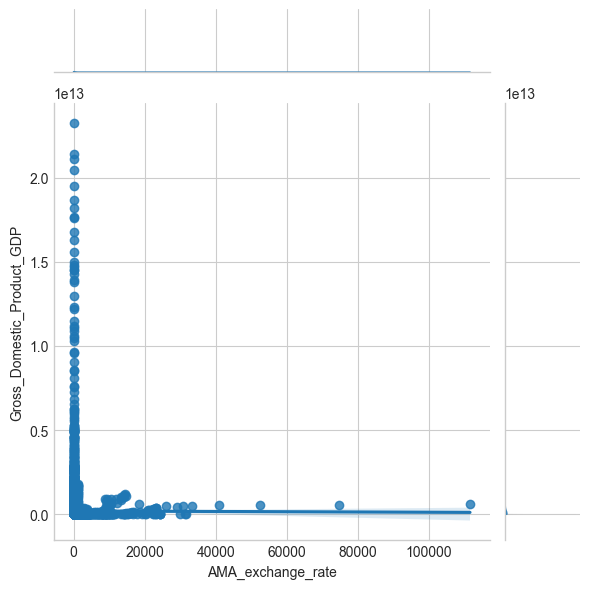

<Figure size 800x600 with 0 Axes>

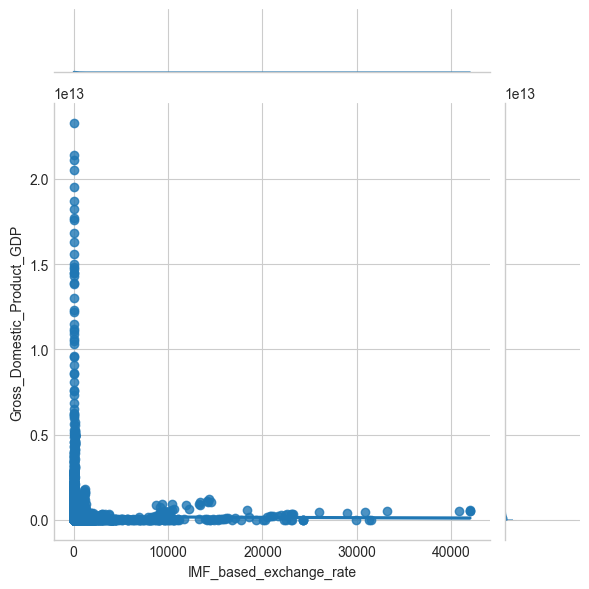

<Figure size 800x600 with 0 Axes>

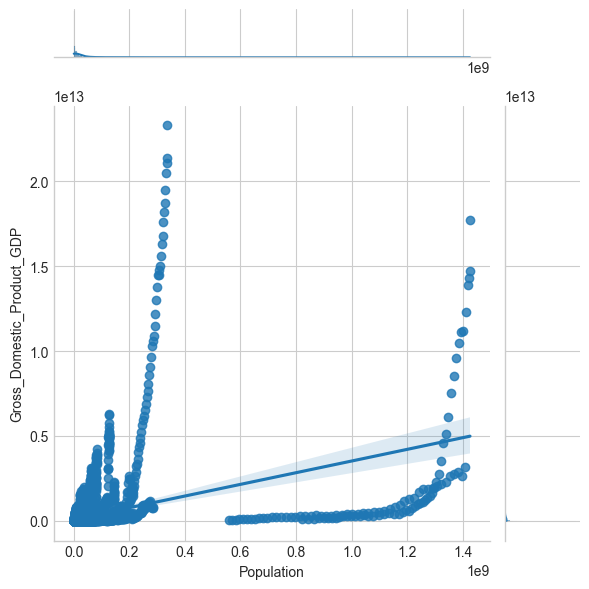

<Figure size 800x600 with 0 Axes>

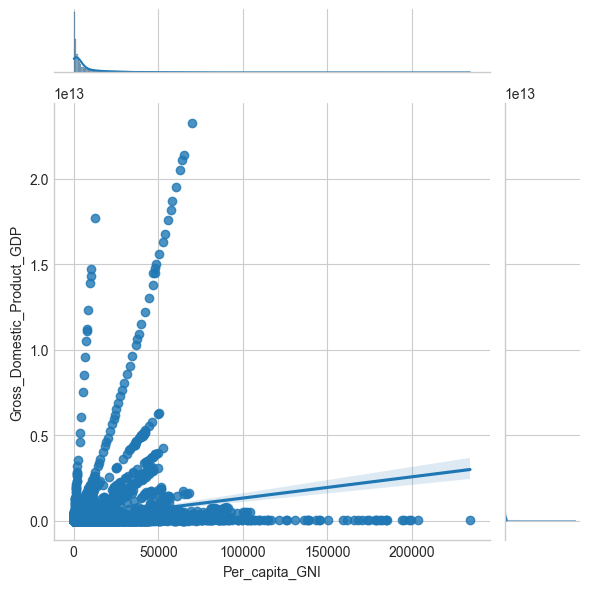

<Figure size 800x600 with 0 Axes>

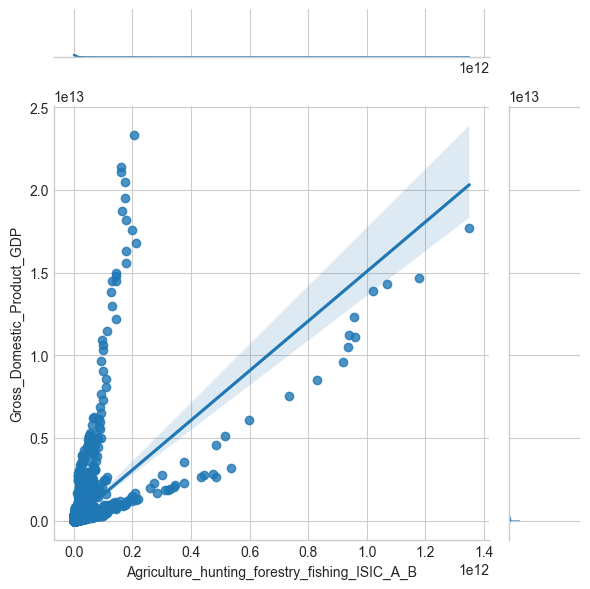

<Figure size 800x600 with 0 Axes>

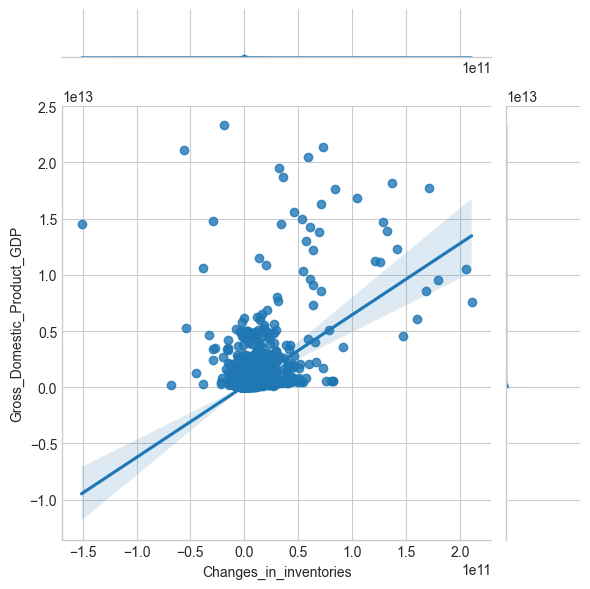

<Figure size 800x600 with 0 Axes>

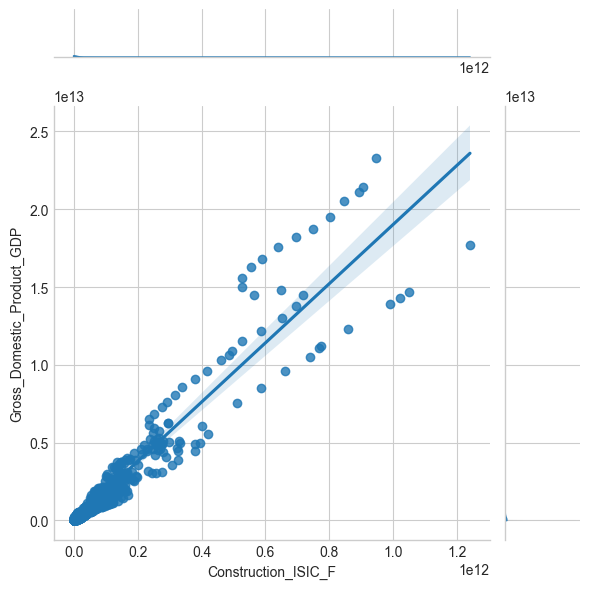

<Figure size 800x600 with 0 Axes>

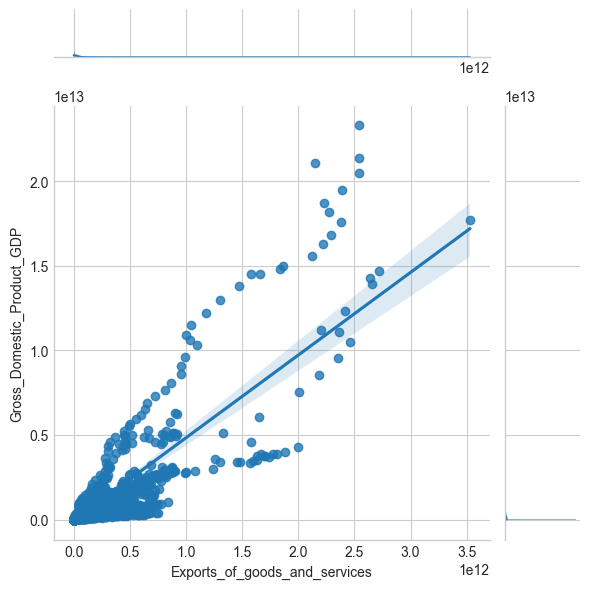

<Figure size 800x600 with 0 Axes>

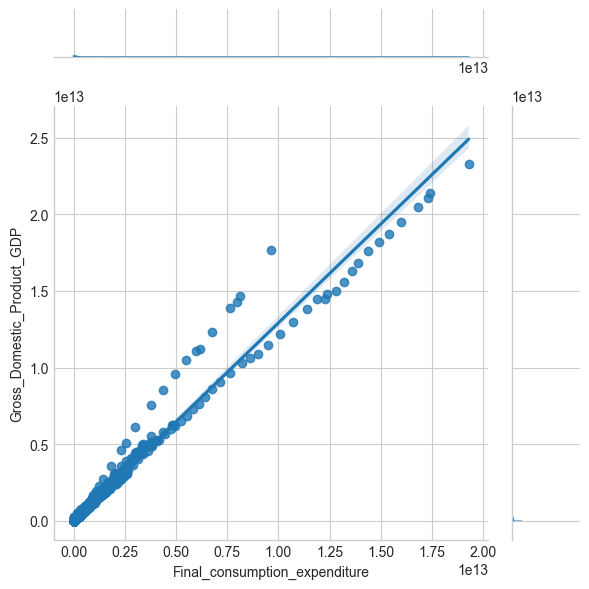

<Figure size 800x600 with 0 Axes>

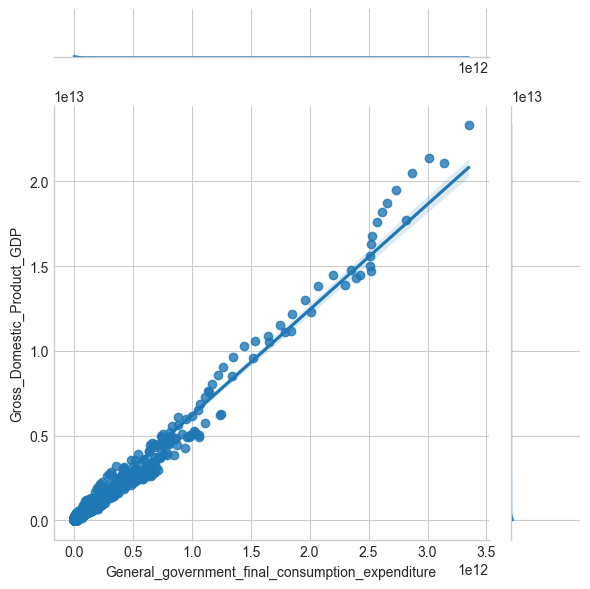

<Figure size 800x600 with 0 Axes>

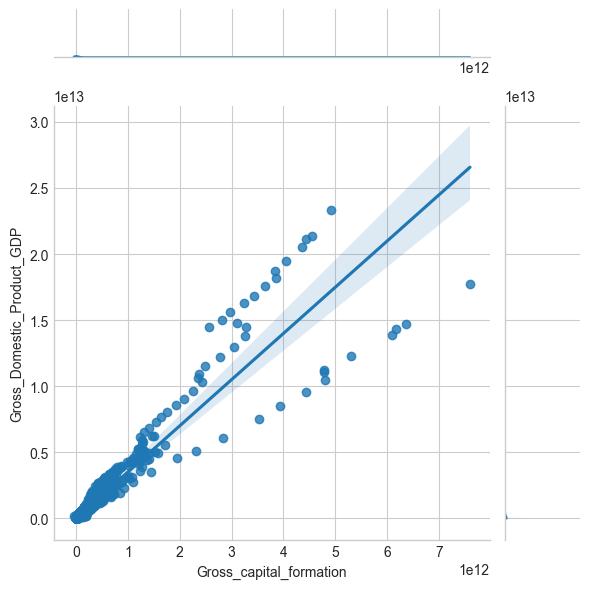

<Figure size 800x600 with 0 Axes>

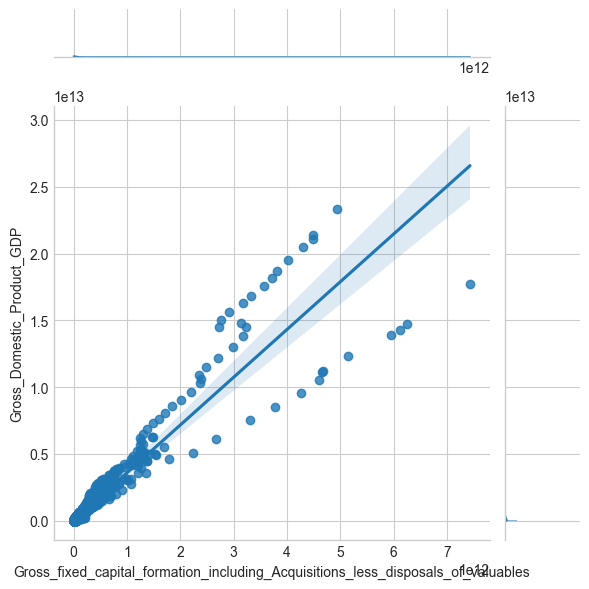

<Figure size 800x600 with 0 Axes>

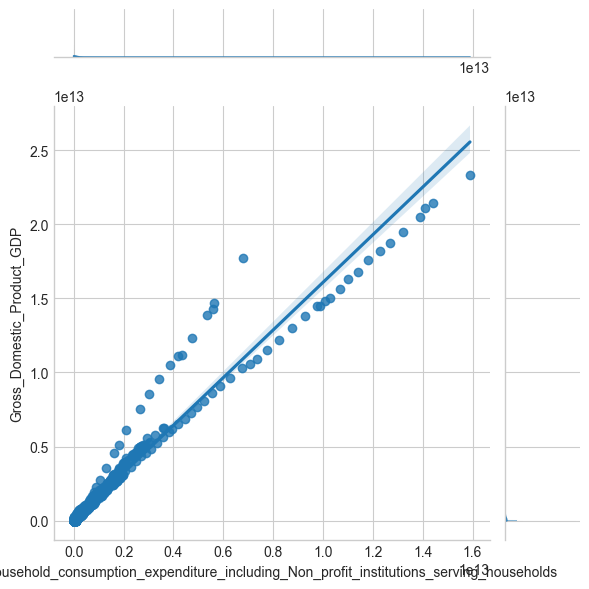

<Figure size 800x600 with 0 Axes>

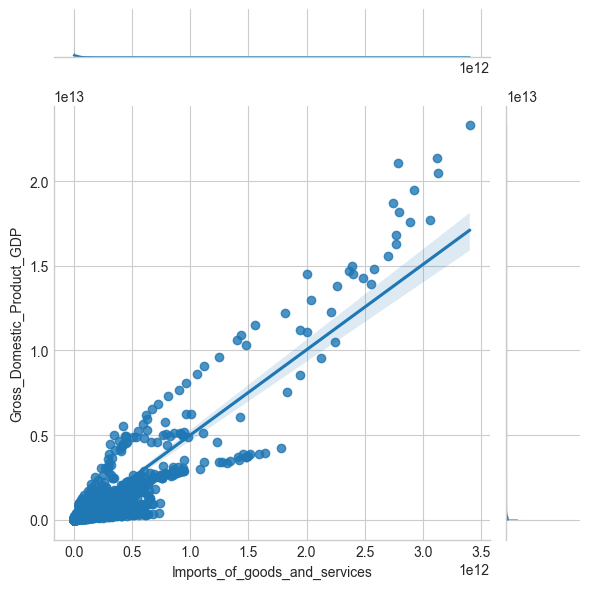

<Figure size 800x600 with 0 Axes>

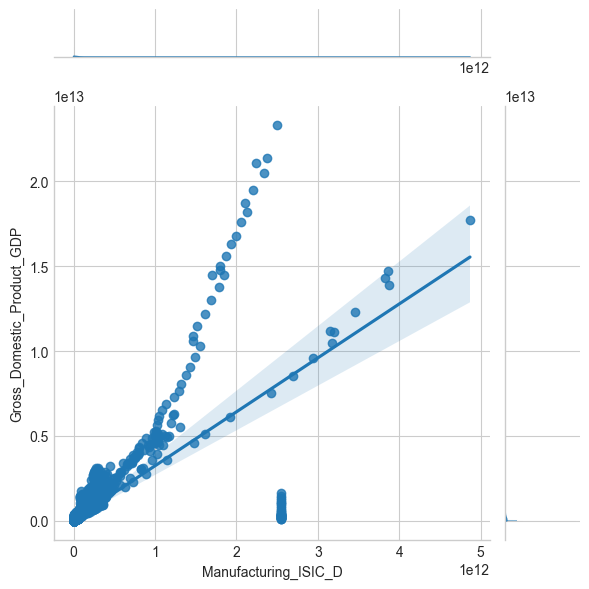

<Figure size 800x600 with 0 Axes>

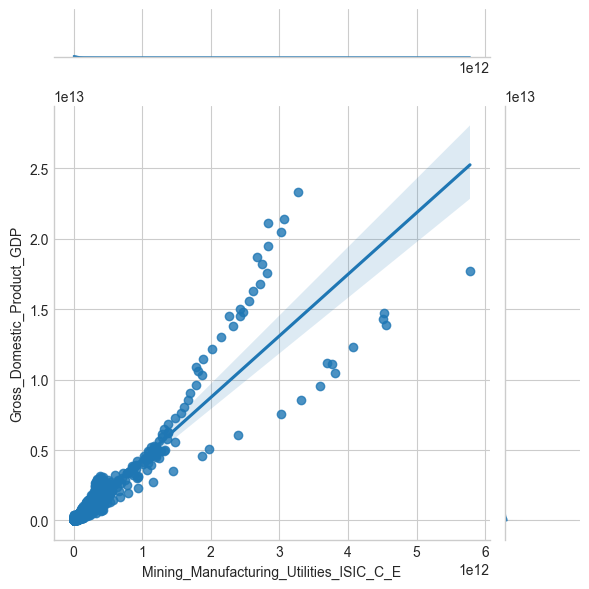

<Figure size 800x600 with 0 Axes>

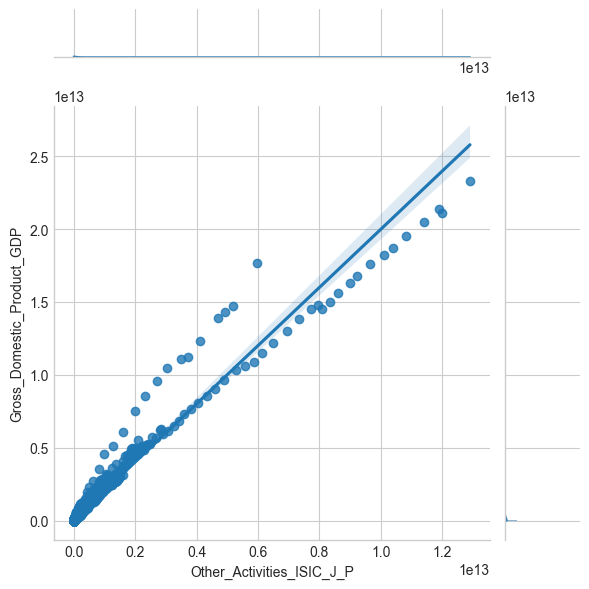

<Figure size 800x600 with 0 Axes>

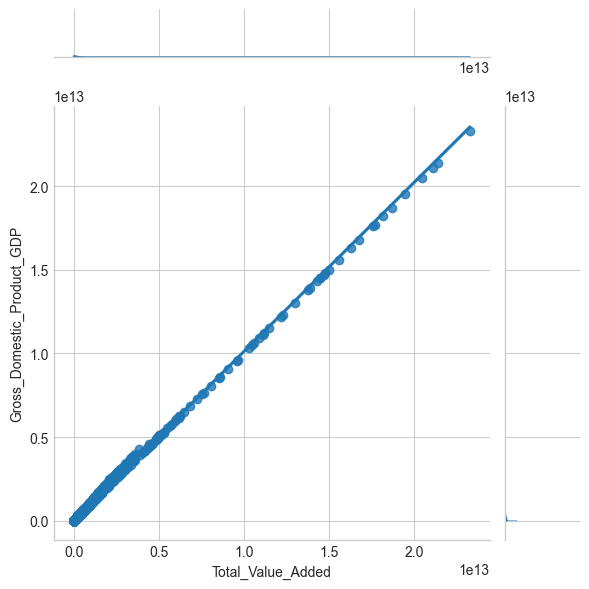

<Figure size 800x600 with 0 Axes>

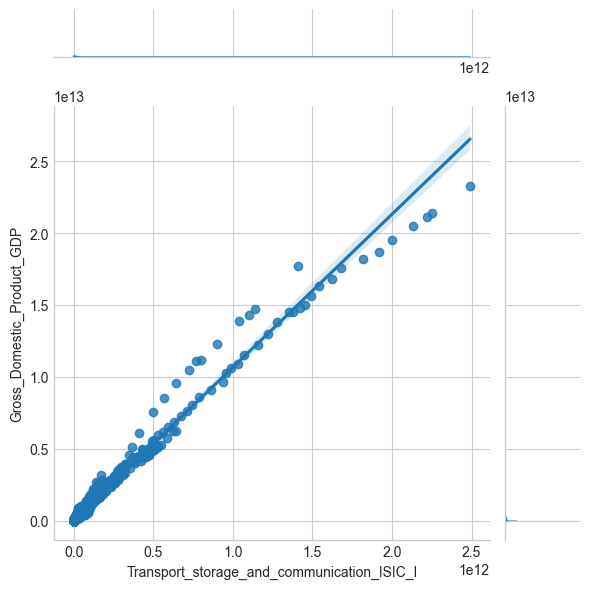

<Figure size 800x600 with 0 Axes>

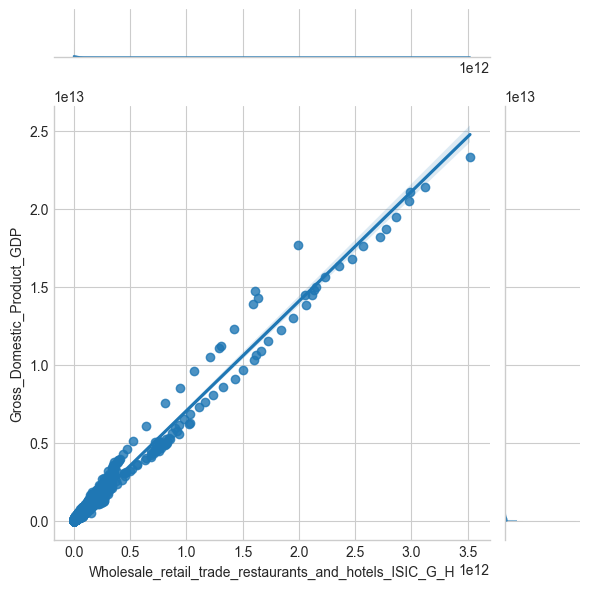

<Figure size 800x600 with 0 Axes>

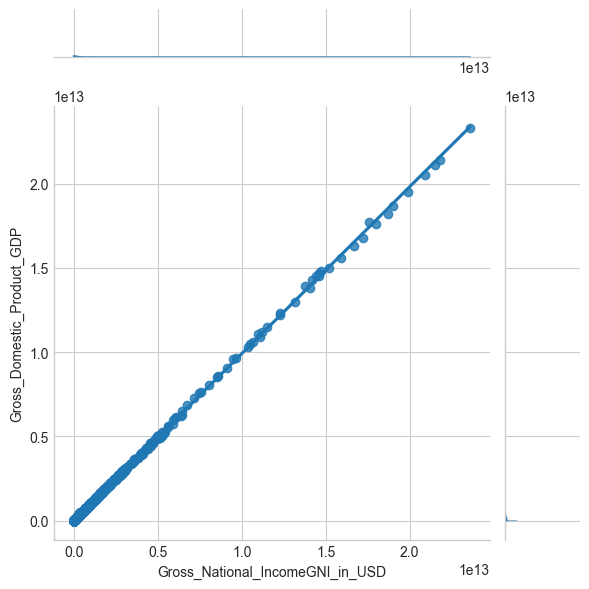

In [13]:
# Visualization of bivariate relationships with joint plots
for variable in independent_variables:
    plt.figure(figsize=(8, 6))
    sns.jointplot(x=variable, y=target_variable, data=df, kind='reg')
    plt.tight_layout()
    plt.show()

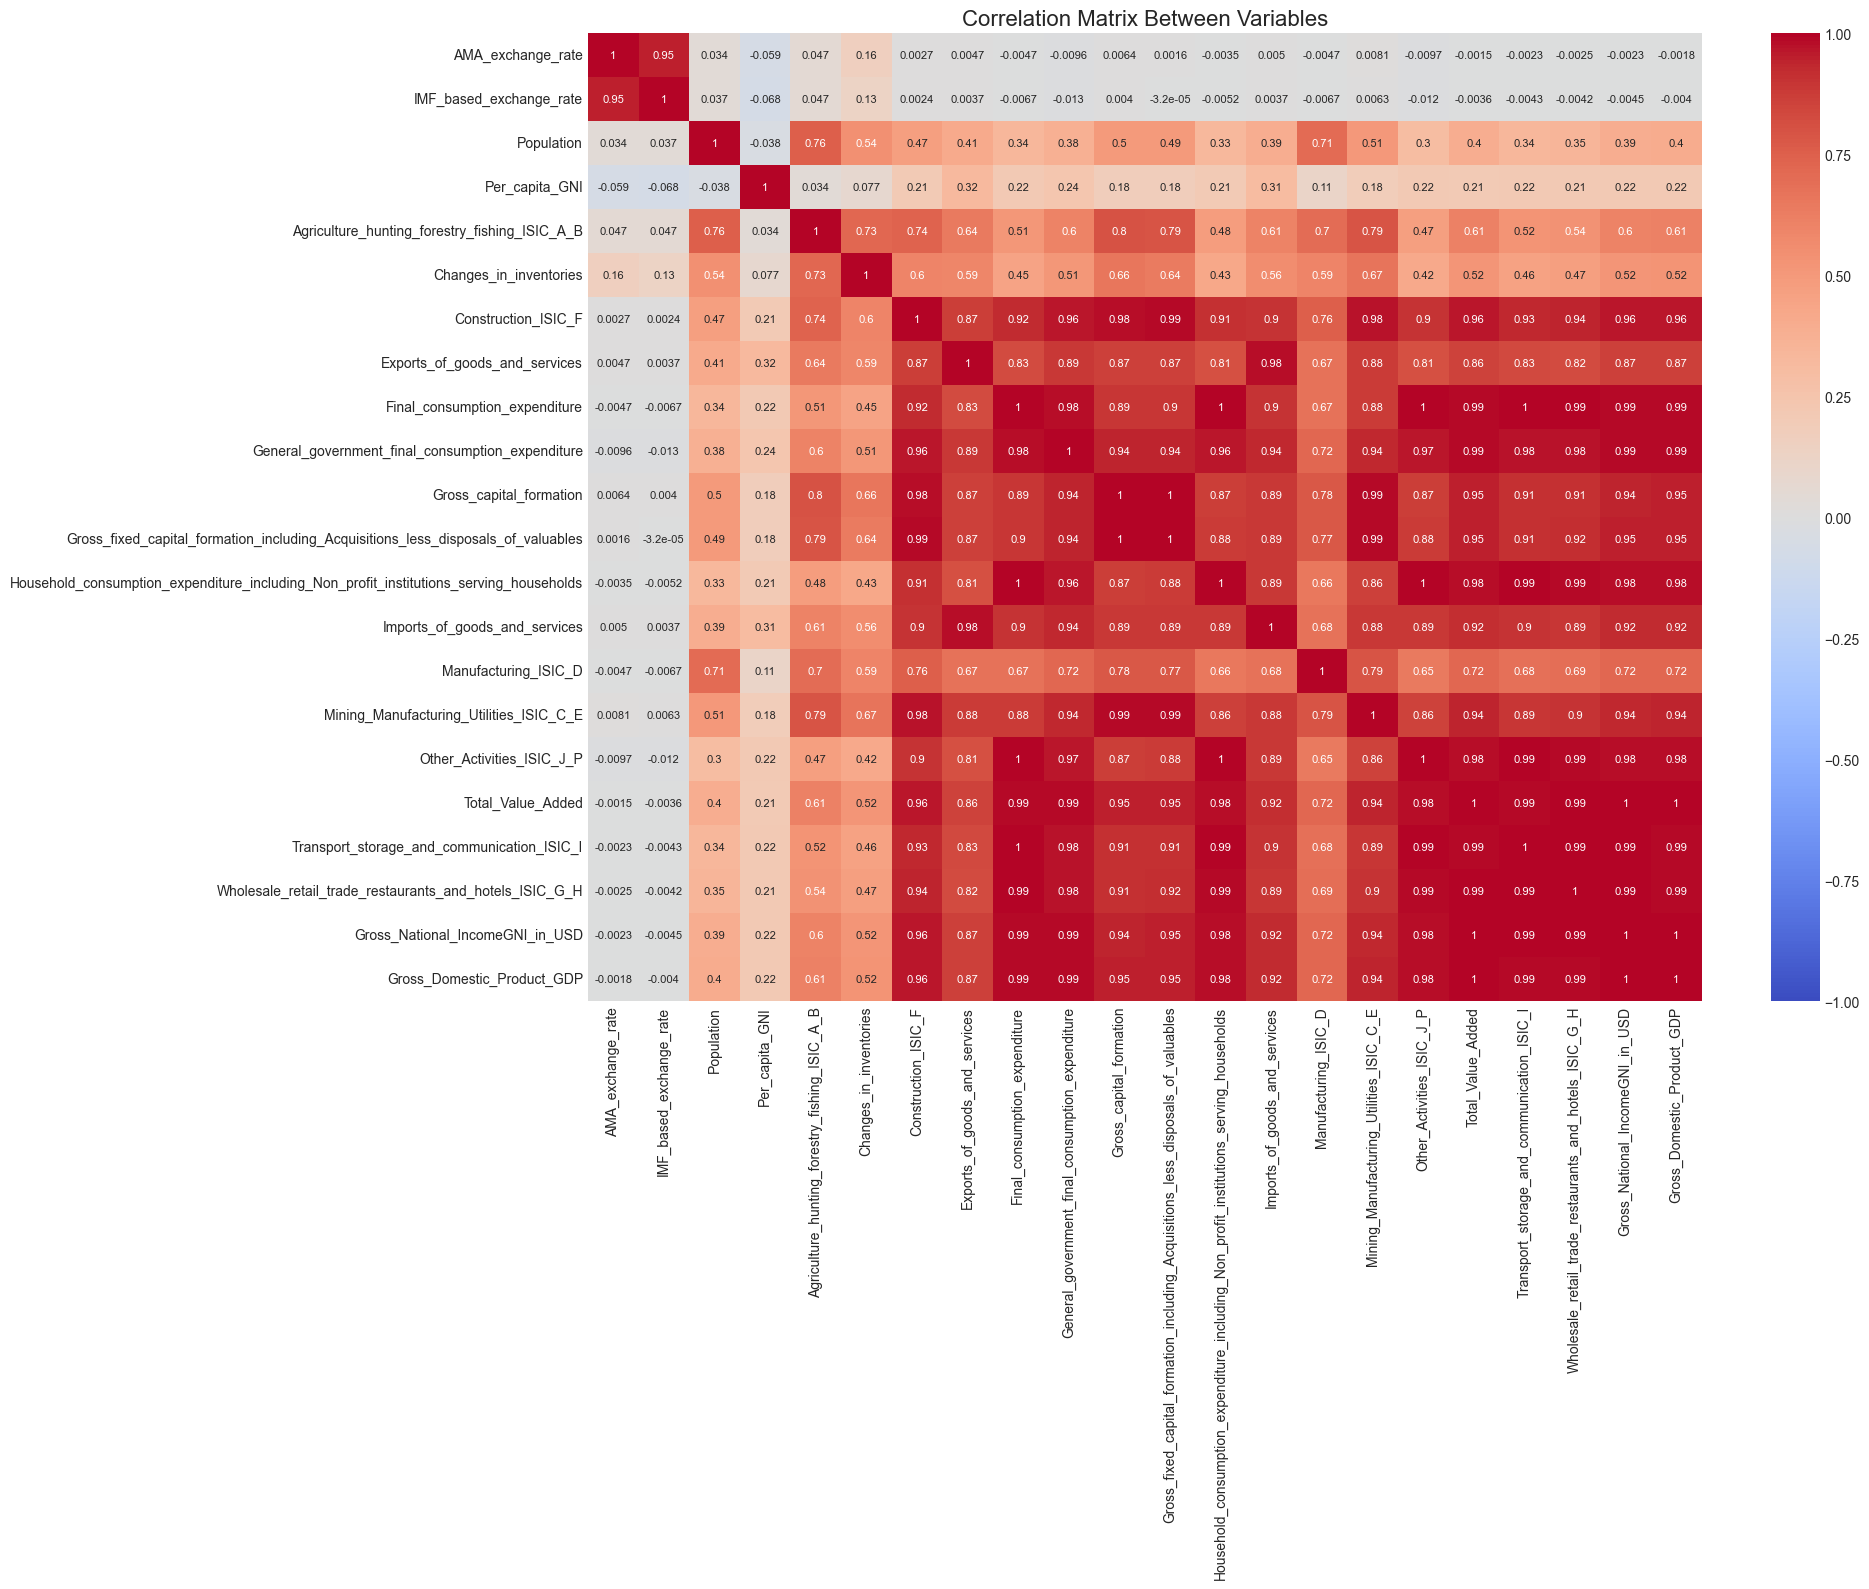

In [14]:
# Define which columns to include in correlation analysis
analysis_columns = independent_variables + [target_variable]

# Generate correlation matrix visualization
plt.figure(figsize=(20, 16))  # Large figure size for readability
correlation = df[analysis_columns].corr()

# Create heatmap visualization
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            annot_kws={"size": 8})  # Smaller font size for annotations

# Rotate axis labels for better readability
plt.xticks(rotation=90, fontsize=10)  # Vertical x-axis labels
plt.yticks(rotation=0, fontsize=10)   # Horizontal y-axis labels

plt.title('Correlation Matrix Between Variables', fontsize=16)
plt.tight_layout()
plt.show()


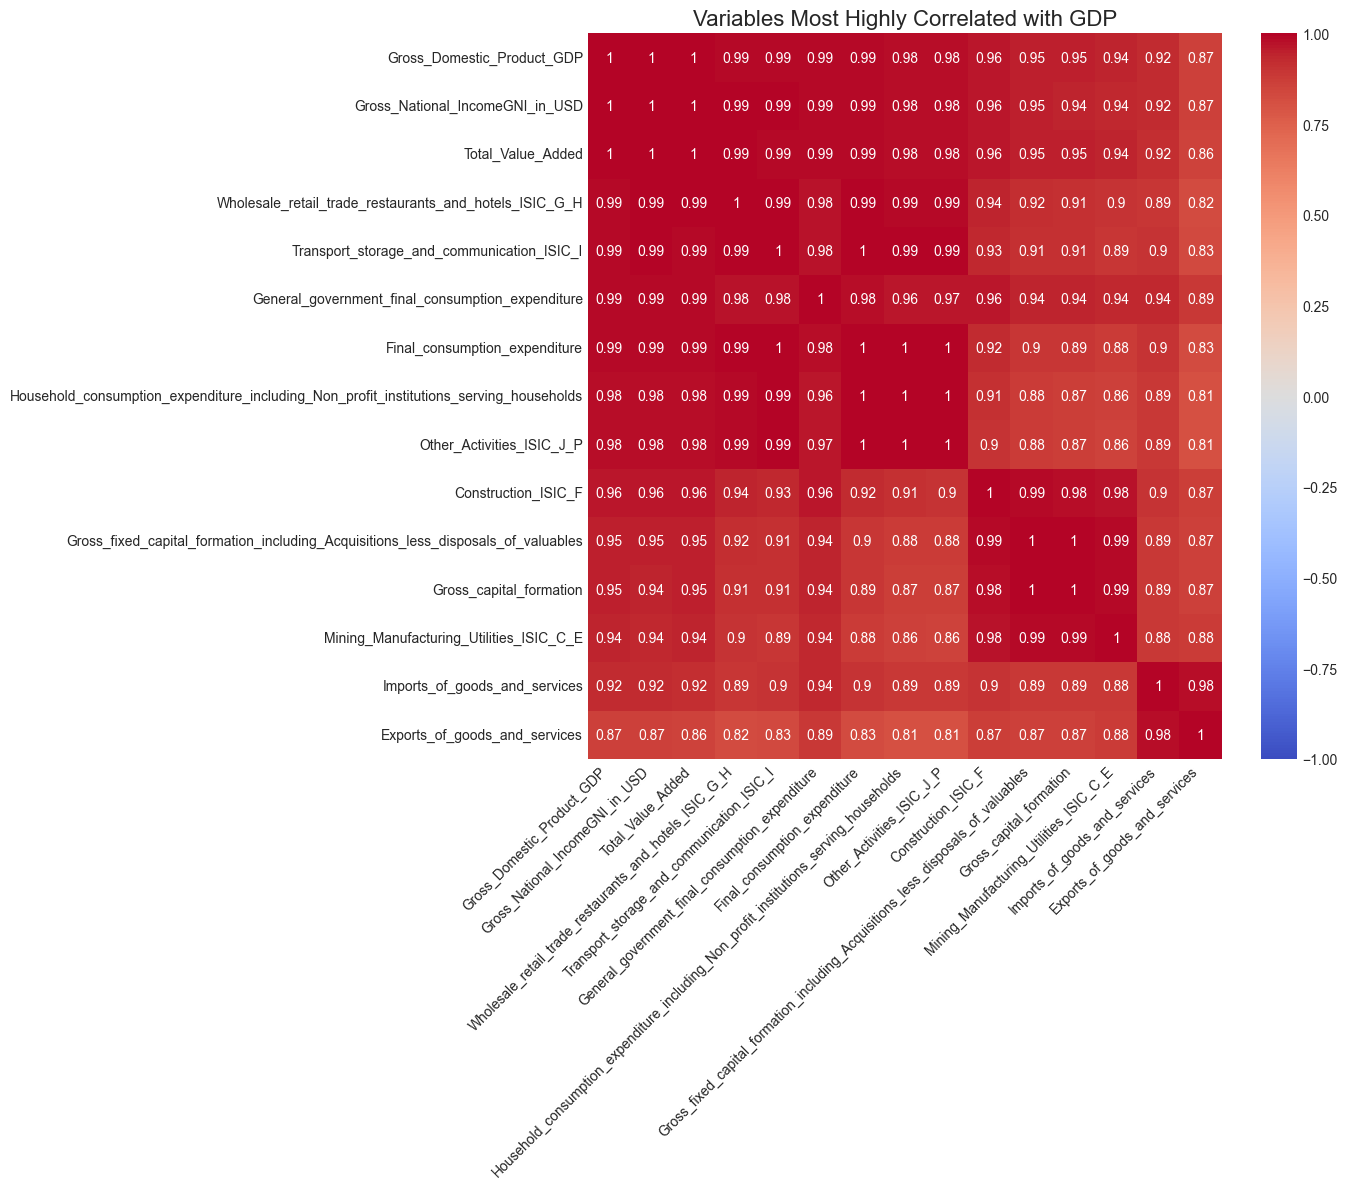

In [15]:
# Calculate correlations with GDP
gdp_correlations = correlation[target_variable].sort_values(ascending=False)

# Select the 15 variables with the highest absolute correlation values
important_variables = gdp_correlations.abs().nlargest(15).index.tolist()

# Create a correlation matrix with only these important variables
important_correlation = correlation.loc[important_variables, important_variables]

# Visualize the correlation matrix of variables most correlated with GDP
plt.figure(figsize=(14, 12))
sns.heatmap(important_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            annot_kws={"size": 10})

# Improve readability by rotating x-axis labels and adjusting font size
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(rotation=0, fontsize=10)
plt.title('Variables Most Highly Correlated with GDP', fontsize=16)
plt.tight_layout()
plt.show()

# Correlation Analysis with GDP

## Overview of Top GDP Correlations

The heatmap above shows the correlation matrix of the 15 variables most strongly correlated with GDP. This analysis reveals important insights about economic indicators and their relationships.

## Key Findings:

1. **Perfect Positive Correlations (r = 1.0)**:
   - GDP has perfect or near-perfect correlations with GNI (Gross National Income) and Total Value Added, which is expected as these are fundamental components of economic output measurement.

2. **Very Strong Positive Correlations (r > 0.95)**:
   - Service sectors show exceptionally strong correlations: wholesale/retail trade, transport/communication, and government expenditure all have correlations above 0.98 with GDP.
   - This suggests the critical role of service sectors in driving economic growth.

3. **Strong Positive Correlations (r = 0.87-0.95)**:
   - Capital formation metrics (both gross capital formation and fixed capital formation) show correlations around 0.95.
   - Construction (0.96) and manufacturing/utilities (0.94) sectors also demonstrate strong positive relationships.
   - Import and export services (0.92 and 0.87 respectively) have the relatively lowest correlations among these top indicators.

## Implications and Potential Actions:

1. **Economic Modeling**:
   - These high correlations support the development of predictive models for GDP growth based on sectoral performance.
   - Consider using leading indicators from the service sectors for early GDP forecasting.

2. **Policy Considerations**:
   - Infrastructure investment supporting transportation and wholesale/retail sectors may yield significant GDP benefits.
   - Service sector development appears to be strongly tied to overall economic performance.

3. **Sector-Specific Analysis**:
   - The slightly lower correlation of exports (0.87) compared to other variables might warrant further investigation into external trade relationships.
   - Government consumption shows stronger correlation than exports, suggesting potential domestic growth drivers.

4. **Further Research Directions**:
   - Investigate causality relationships beyond correlation using time-series analysis or Granger causality tests.
   - Explore the lower-correlated variables not shown here to identify potential emerging economic drivers.
   - Examine how these relationships might vary across different economic development stages or country groups.

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
# Split the data first
X = df[independent_variables]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [19]:
# Scale the data - using StandardScaler as the default
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [20]:
# Create DataFrame with scaled features (for easier inspection)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [21]:
# Check scaled data distribution
print("Original data statistics:")
print(X_train.describe().loc[['mean', 'std', 'min', 'max']].T)

print("\nScaled data statistics:")
print(X_train_scaled_df.describe().loc[['mean', 'std', 'min', 'max']].T)

Original data statistics:
                                                            mean  \
AMA_exchange_rate                                   3.592495e+02   
IMF_based_exchange_rate                             3.437189e+02   
Population                                          2.875444e+07   
Per_capita_GNI                                      8.814850e+03   
Agriculture_hunting_forestry_fishing_ISIC_A_B       8.240099e+09   
Changes_in_inventories                              1.408163e+09   
Construction_ISIC_F                                 1.045507e+10   
Exports_of_goods_and_services                       4.705410e+10   
Final_consumption_expenditure                       1.375053e+11   
General_government_final_consumption_expenditure    3.142723e+10   
Gross_capital_formation                             4.889222e+10   
Gross_fixed_capital_formation_including_Acquisi...  4.750309e+10   
Household_consumption_expenditure_including_Non...  1.064965e+11   
Imports_of_goods_and_s

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [23]:
# 1. Polynomial Regression with Pipeline
degrees = [1, 2, 3]
poly_results = []

for degree in degrees:
    # Create pipeline with scaling
    poly_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=degree)),
        ('regression', LinearRegression())
    ])
    
    # Fit and evaluate
    poly_pipeline.fit(X_train, y_train)
    y_pred = poly_pipeline.predict(X_test)
    
    # Store results
    poly_results.append({
        'degree': degree,
        'r2': r2_score(y_test, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred))
    })
    
    print(f"Polynomial Degree {degree}:")
    print(f"  R²: {poly_results[-1]['r2']:.4f}")
    print(f"  RMSE: {poly_results[-1]['rmse']:.4f}")

Polynomial Degree 1:
  R²: 1.0000
  RMSE: 4552777128.8448
Polynomial Degree 2:
  R²: 0.9961
  RMSE: 58698215417.7961
Polynomial Degree 3:
  R²: -11775.5771
  RMSE: 102380383224680.1094


In [24]:
# 2. Decision Tree (scaling less important but included for consistency)
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeRegressor(random_state=42))
])

param_grid_dt = {
    'dt__max_depth': [None, 5, 10, 15, 20],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

print("\nBest Decision Tree Parameters:", grid_dt.best_params_)
y_pred_dt = best_dt.predict(X_test)
print(f"Decision Tree Test R²: {r2_score(y_test, y_pred_dt):.4f}")
print(f"Decision Tree Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt)):.4f}")


Best Decision Tree Parameters: {'dt__max_depth': 20, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}
Decision Tree Test R²: 0.9965
Decision Tree Test RMSE: 55514554484.5871


In [25]:
# 3. Random Forest with Pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

print("\nBest Random Forest Parameters:", grid_rf.best_params_)
y_pred_rf = best_rf.predict(X_test)
print(f"Random Forest Test R²: {r2_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.4f}")


Best Random Forest Parameters: {'rf__max_depth': 20, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Random Forest Test R²: 0.9995
Random Forest Test RMSE: 21685941865.2660


In [26]:
# 4. Gradient Boosting with Pipeline
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingRegressor(random_state=42))
])

param_grid_gb = {
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.01, 0.1],
    'gb__max_depth': [3, 5],
    'gb__subsample': [0.8, 1.0]
}

grid_gb = GridSearchCV(gb_pipeline, param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_

print("\nBest Gradient Boosting Parameters:", grid_gb.best_params_)
y_pred_gb = best_gb.predict(X_test)
print(f"Gradient Boosting Test R²: {r2_score(y_test, y_pred_gb):.4f}")
print(f"Gradient Boosting Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb)):.4f}")


Best Gradient Boosting Parameters: {'gb__learning_rate': 0.1, 'gb__max_depth': 5, 'gb__n_estimators': 200, 'gb__subsample': 0.8}
Gradient Boosting Test R²: 0.9990
Gradient Boosting Test RMSE: 29449505582.6979


In [27]:
# 5. Support Vector Regression with Pipeline
# SVR is particularly sensitive to feature scaling
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('svr', SVR())
])

param_grid_svr = {
    'svr__kernel': ['linear', 'poly', 'rbf'],
    'svr__C': [0.1, 1, 10],
    'svr__gamma': ['scale', 'auto', 0.1],
    'svr__epsilon': [0.1, 0.01, 0.001]
}

grid_svr = GridSearchCV(svr_pipeline, param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_svr.fit(X_train, y_train)
best_svr = grid_svr.best_estimator_

print("\nBest SVR Parameters:", grid_svr.best_params_)
y_pred_svr = best_svr.predict(X_test)
print(f"SVR Test R²: {r2_score(y_test, y_pred_svr):.4f}")
print(f"SVR Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_svr)):.4f}")


Best SVR Parameters: {'svr__C': 10, 'svr__epsilon': 0.1, 'svr__gamma': 0.1, 'svr__kernel': 'poly'}
SVR Test R²: -0.0298
SVR Test RMSE: 957362210647.9790


In [28]:
# Collect all the predictions
predictions = {
    f'Polynomial (deg={degree})': Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=degree)),
        ('regression', LinearRegression())
    ]).fit(X_train, y_train).predict(X_test) 
    for degree in degrees
}

# Add tree-based and SVR models
predictions.update({
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'SVR': y_pred_svr
})

# Calculate metrics for all models
model_metrics = pd.DataFrame({
    'Model': list(predictions.keys()),
    'R²': [r2_score(y_test, pred) for pred in predictions.values()],
    'RMSE': [np.sqrt(mean_squared_error(y_test, pred)) for pred in predictions.values()]
})

# Sort by R² for display
model_metrics = model_metrics.sort_values('R²', ascending=False).reset_index(drop=True)
print("\nModel Performance Comparison:")
print(model_metrics)



Model Performance Comparison:
                Model            R²          RMSE
0  Polynomial (deg=1)      0.999977  4.552777e+09
1       Random Forest      0.999472  2.168594e+10
2   Gradient Boosting      0.999026  2.944951e+10
3       Decision Tree      0.996537  5.551455e+10
4  Polynomial (deg=2)      0.996129  5.869822e+10
5                 SVR     -0.029765  9.573622e+11
6  Polynomial (deg=3) -11775.577133  1.023804e+14


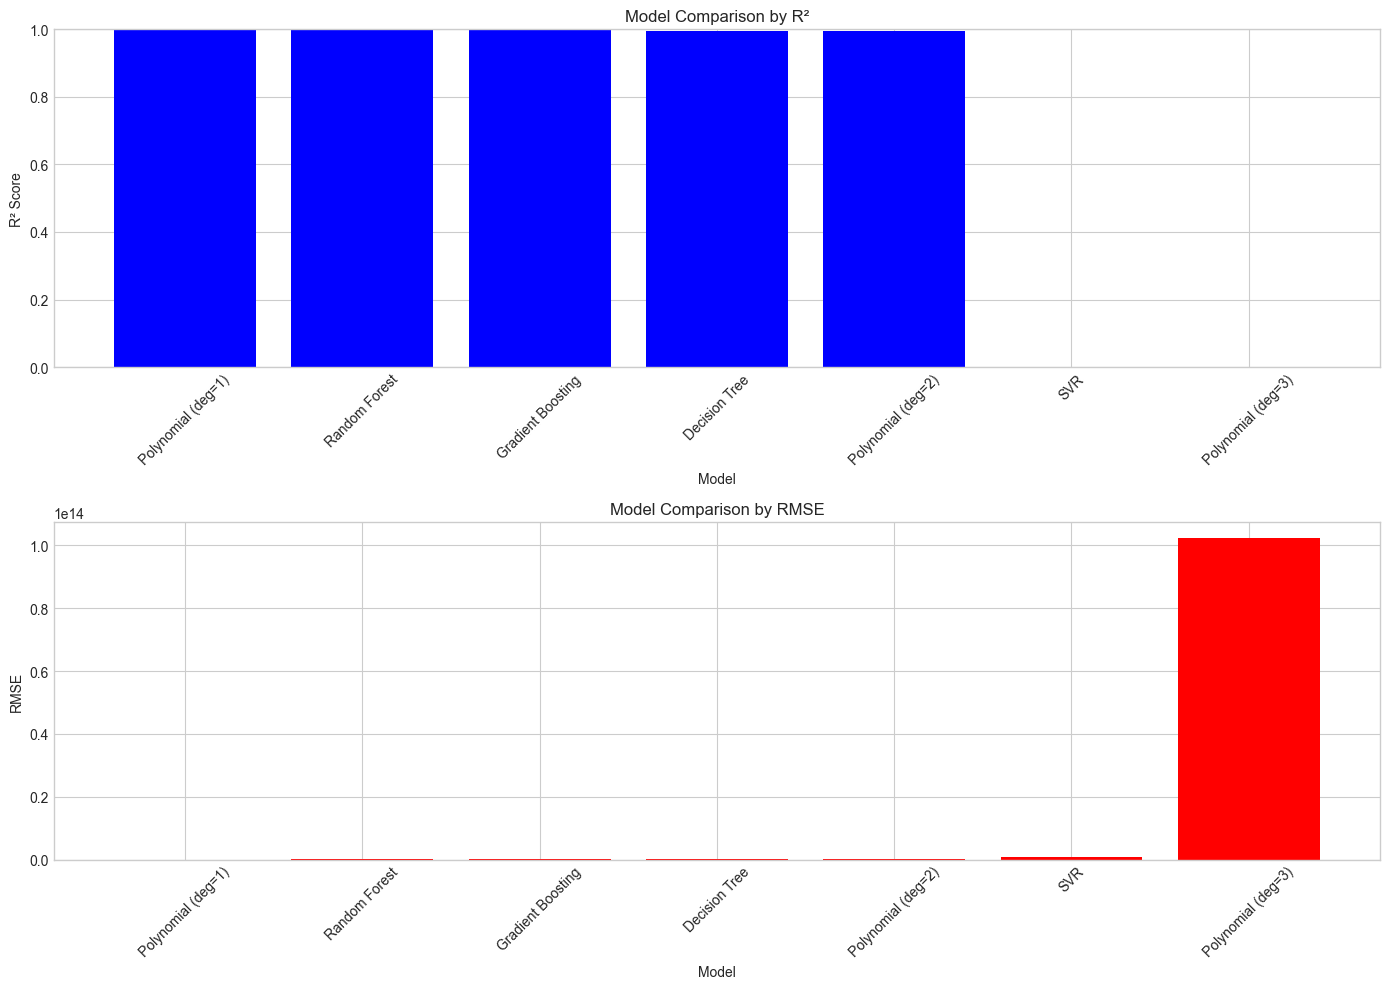

In [29]:
# Visualize model comparison
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.bar(model_metrics['Model'], model_metrics['R²'], color='blue')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Model Comparison by R²')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # R² typically ranges from 0 to 1

plt.subplot(2, 1, 2)
plt.bar(model_metrics['Model'], model_metrics['RMSE'], color='red')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Comparison by RMSE')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Model Comparison: Finding the Best Regression Approach

In this section, we evaluate multiple regression techniques to identify the most effective approach for GDP prediction. We implement and compare:

- Polynomial Regression with degrees 1-3
- Decision Tree Regression with hyperparameter tuning
- Random Forest Regression with hyperparameter tuning
- Gradient Boosting Regression with hyperparameter tuning
- Support Vector Regression with different kernels

Each model is evaluated using R² score and RMSE. Surprisingly, linear regression (Polynomial degree 1) performs extraordinarily well (R² of 0.999977), followed by Random Forest (0.999472) and Gradient Boosting (0.999026). The extremely poor performance of Polynomial degree 3 (R² of -11775.58) demonstrates the danger of overfitting with higher-order polynomials.

These initial results suggest strong linear relationships between economic indicators and GDP, though the suspiciously high R² values warrant further investigation for potential data leakage or overfitting.

In [30]:
# Create a better pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Fine-tune the parameters
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 15, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 0.33]
}

# Find the best parameters using 5-fold cross-validation
grid_search = GridSearchCV(
    rf_pipeline, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all CPU cores
)

grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Evaluate the model
y_pred = best_rf.predict(X_test)
print(f"R²: {r2_score(y_test, y_pred):.6f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2e}")

Best parameters: {'rf__max_depth': None, 'rf__max_features': 0.33, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
R²: 0.998949
RMSE: 3.06e+10


## Random Forest Optimization

Based on the promising results from the initial comparison, we proceed with the Random Forest model for further optimization. This section implements a more comprehensive hyperparameter search:

- Testing more estimators (100, 200, 300 trees)
- Evaluating various maximum tree depths
- Adjusting minimum samples required for splitting nodes
- Testing different minimum leaf sizes
- Comparing feature selection strategies ('auto', 'sqrt', percentage-based)

The optimized Random Forest model maintains high performance while potentially reducing overfitting through careful parameter selection. We visualize feature importance to understand which economic indicators have the strongest predictive power for GDP.

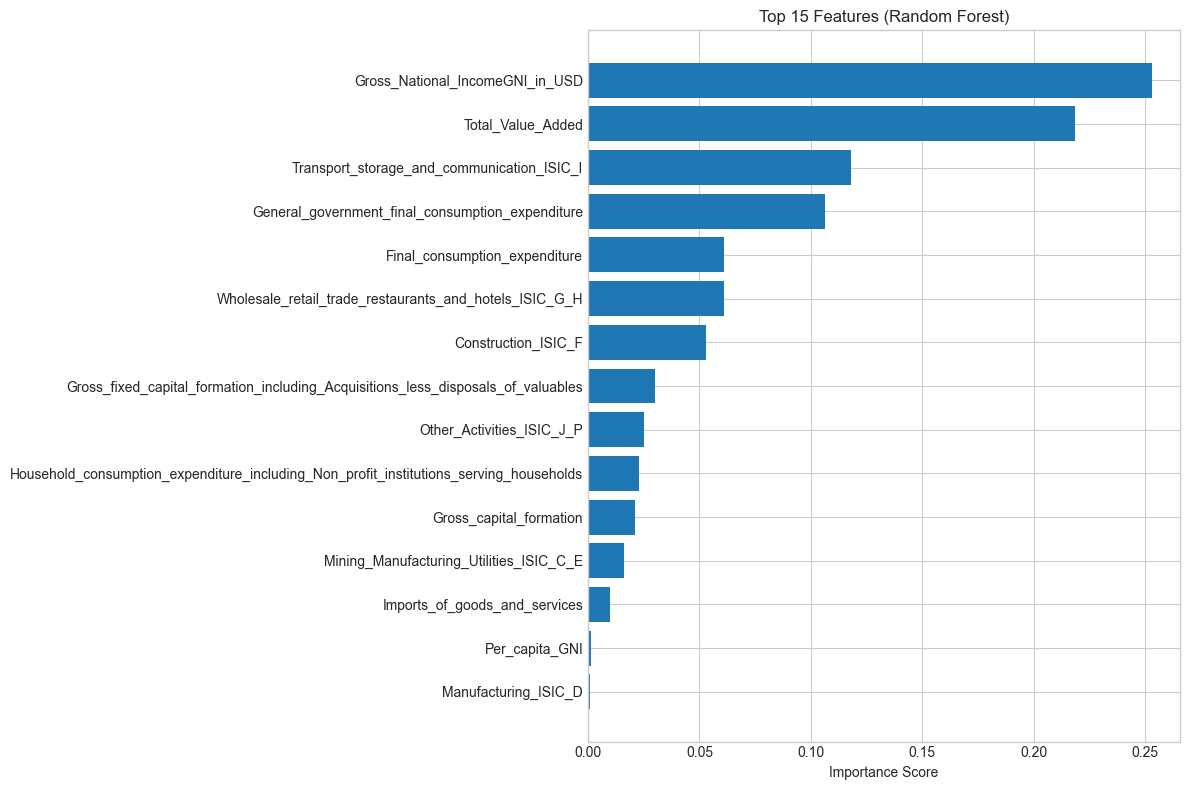

In [31]:
# Visualize feature importance
rf_model = best_rf.named_steps['rf']
feature_importance = pd.DataFrame({
    'Feature': independent_variables,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'][:15], feature_importance['Importance'][:15])
plt.xlabel('Importance Score')
plt.title('Top 15 Features (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [32]:
# Define the direct components of GDP
gdp_components = [
    'Gross_National_IncomeGNI_in_USD',
    'Total_Value_Added',
    'Final_consumption_expenditure', 
    'Household_consumption_expenditure_including_Non_profit_institutions_serving_households',
    'Gross_fixed_capital_formation_including_Acquisitions_less_disposals_of_valuables',
    'Gross_capital_formation',
    'Exports_of_goods_and_services',
    'Imports_of_goods_and_services'
]

# Select the remaining independent variables by excluding the GDP components
clean_independent_variables = [col for col in independent_variables 
                             if col not in gdp_components]

print(f"Previous number of variables: {len(independent_variables)}")
print(f"New number of variables: {len(clean_independent_variables)}")
print("\nVariables to be used:")
for i, var in enumerate(clean_independent_variables, 1):
    print(f"{i}. {var}")

# Split the data again
X = df[clean_independent_variables]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Parameters for GridSearch
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

# Find the best model with GridSearch
grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Previous number of variables: 21
New number of variables: 13

Variables to be used:
1. AMA_exchange_rate
2. IMF_based_exchange_rate
3. Population
4. Per_capita_GNI
5. Agriculture_hunting_forestry_fishing_ISIC_A_B
6. Changes_in_inventories
7. Construction_ISIC_F
8. General_government_final_consumption_expenditure
9. Manufacturing_ISIC_D
10. Mining_Manufacturing_Utilities_ISIC_C_E
11. Other_Activities_ISIC_J_P
12. Transport_storage_and_communication_ISIC_I
13. Wholesale_retail_trade_restaurants_and_hotels_ISIC_G_H


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20],
                         'rf__min_samples_leaf': [1, 2],
                         'rf__min_samples_split': [2, 5],
                         'rf__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

## Feature Selection: Removing Direct GDP Components

To create a more insightful and less trivially accurate model, we identify and remove variables that are direct components of GDP calculation:

- National Income (GNI)
- Total Value Added
- Consumption expenditures
- Capital formation metrics
- Import/export figures

This critical step transforms our analysis from "predicting GDP using GDP components" (which would be mathematically trivial) to "predicting GDP using underlying economic indicators" (which provides actual insights into economic drivers).

After removing these components, we retrain the model and evaluate its performance. Though R² values are expected to decrease somewhat, this refined model offers more meaningful insights into which sectoral and macroeconomic factors truly drive GDP.

In [33]:
# Create a better pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Fine-tune the parameters
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 15, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 0.33]
}

# Find the best parameters using 5-fold cross-validation
grid_search = GridSearchCV(
    rf_pipeline, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all CPU cores
)

grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Evaluate the model
y_pred = best_rf.predict(X_test)
print(f"R²: {r2_score(y_test, y_pred):.6f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2e}")

Best parameters: {'rf__max_depth': 10, 'rf__max_features': 0.33, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}
R²: 0.998636
RMSE: 3.48e+10


In [34]:
# Best model
best_rf = grid_search.best_estimator_
print("\nBest parameters:", grid_search.best_params_)

# Evaluate on test set
y_pred = best_rf.predict(X_test)
print(f"\nReduced Model Performance:")
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2e}")


Best parameters: {'rf__max_depth': 10, 'rf__max_features': 0.33, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 300}

Reduced Model Performance:
R²: 0.9986
RMSE: 3.48e+10


In [35]:
# Visualize feature importances
rf_model = best_rf.named_steps['rf']
feature_importance = pd.DataFrame({
    'Feature': clean_independent_variables,  # Keeping the original variable name
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

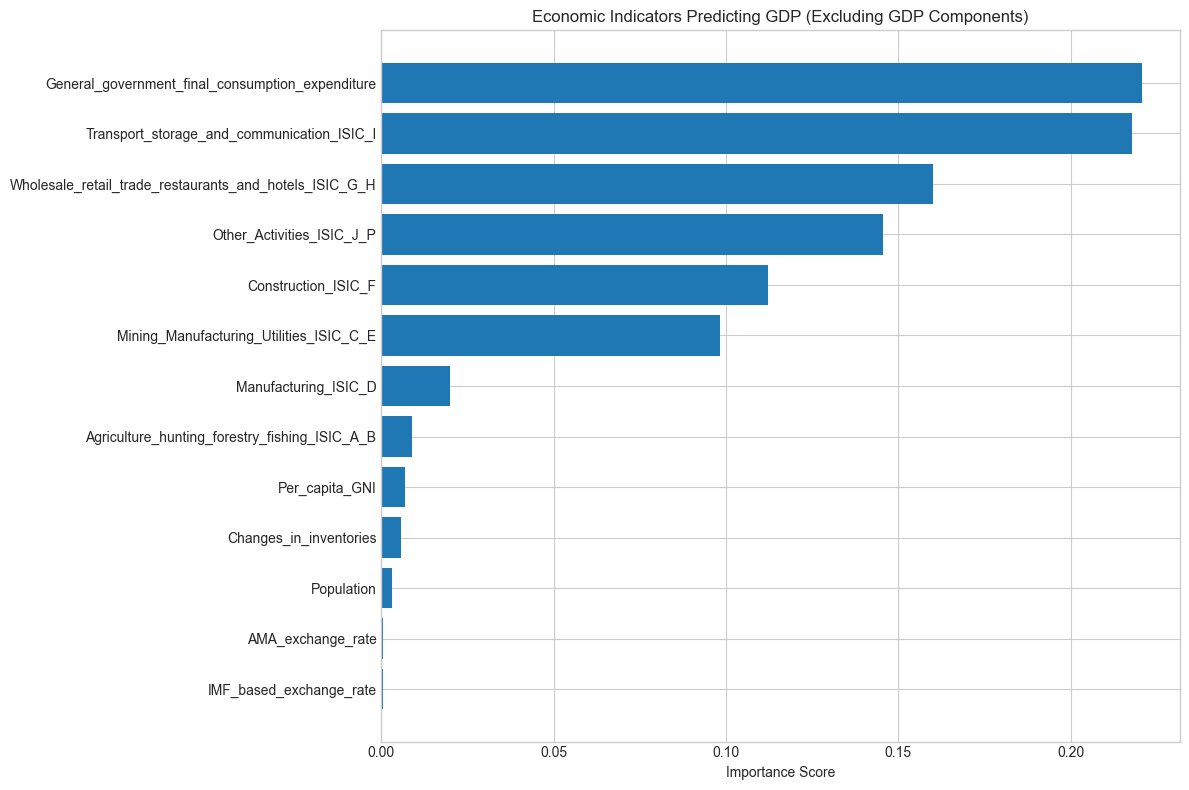

In [36]:
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance Score')
plt.title('Economic Indicators Predicting GDP (Excluding GDP Components)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

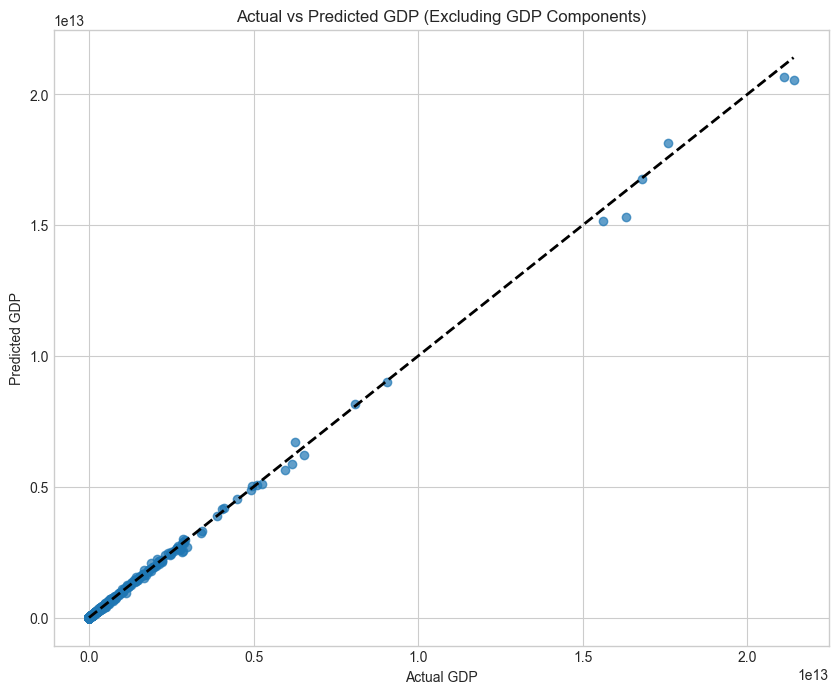

In [37]:
# Compare actual vs predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs Predicted GDP (Excluding GDP Components)')
plt.grid(True)
plt.show()

In [38]:
from sklearn.model_selection import learning_curve, cross_val_score, KFold
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
# 1. Test Performance Stability with K-Fold Cross-Validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Apply stronger regularization to prevent overfitting
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(
        n_estimators=300,  # Increased from 200
        max_depth=15,      # Reduced from 20
        min_samples_split=2,
        min_samples_leaf=10,  # Increased from 1 (stronger regularization)
        max_features='sqrt',  # Use square root of features (stronger regularization)
        bootstrap=True,
        random_state=42
    ))
])

cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')

In [40]:
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R²: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

Cross-Validation R² Scores: [0.9987336  0.97220049 0.96512206 0.97901489 0.99761777 0.99107867
 0.94951418 0.99490991 0.99352218 0.9857932 ]
Mean R²: 0.9828
Standard Deviation: 0.0154


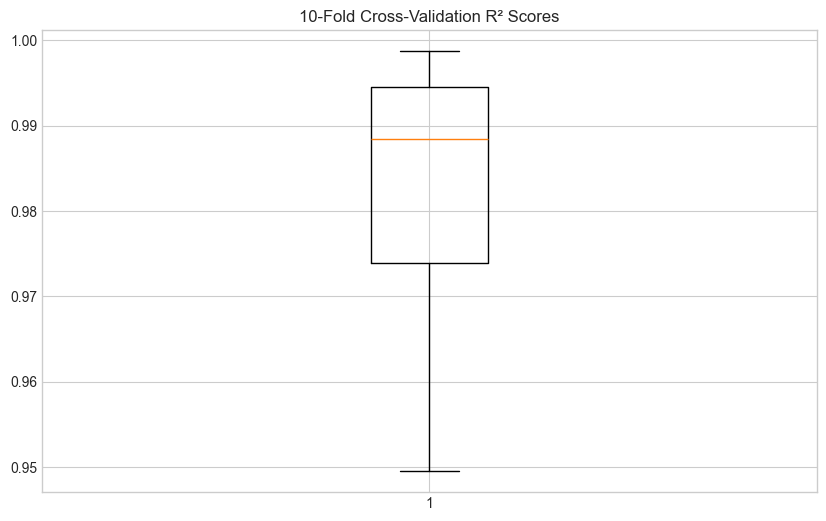

In [41]:
# Visualize the distribution of scores
plt.figure(figsize=(10, 6))
plt.boxplot(cv_scores)
plt.title('10-Fold Cross-Validation R² Scores')
plt.grid(True)
plt.savefig('cv_scores_boxplot.png')
plt.show()

In [42]:
# 2. Learning Curves - Critical test for overfitting
train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X, y, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='r2', n_jobs=-1)

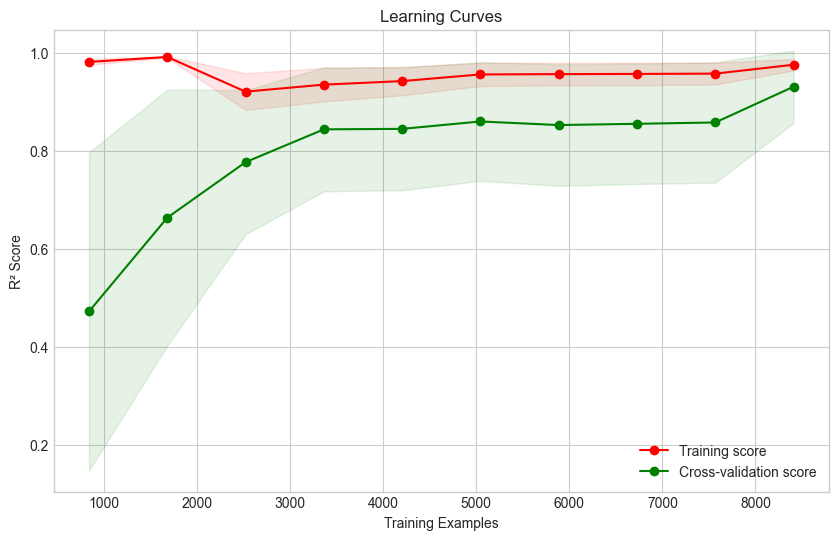

In [43]:
# Plot learning curves
plt.figure(figsize=(10, 6))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.xlabel('Training Examples')
plt.ylabel('R² Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('learning_curves.png')
plt.show()

In [44]:
# 3. Performance by Model Complexity
max_depths = [2, 5, 10, 15, 20, 25, 30, None]
train_scores = []
test_scores = []

for depth in max_depths:
    # Apply regularization consistently across different depths
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestRegressor(
            n_estimators=300, 
            max_depth=depth, 
            min_samples_leaf=5,
            max_features='sqrt',
            bootstrap=True,
            random_state=42
        ))
    ])
    
    pipeline.fit(X_train, y_train)
    
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)
    
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    
    train_scores.append(train_r2)
    test_scores.append(test_r2)


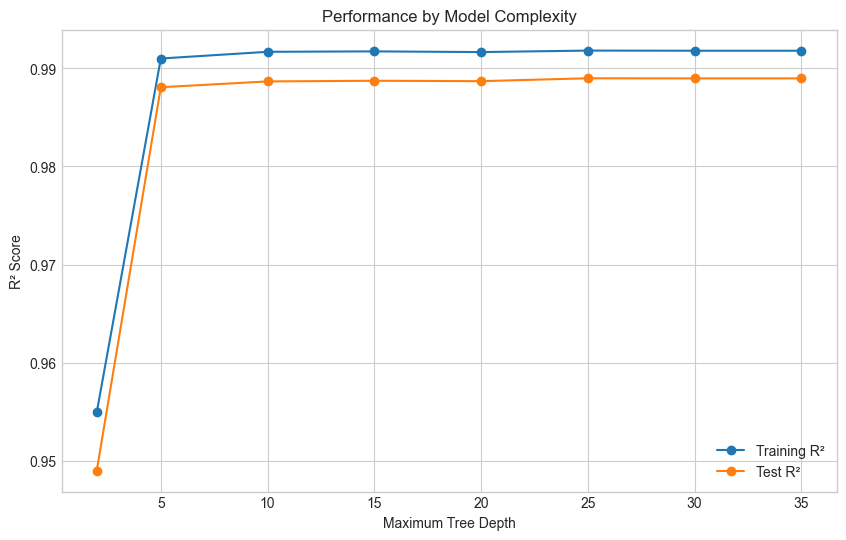

In [45]:
# Visualize model complexity
plt.figure(figsize=(10, 6))
plt.plot(max_depths[:7] + [max(max_depths[:7])+5], train_scores, 'o-', label='Training R²')
plt.plot(max_depths[:7] + [max(max_depths[:7])+5], test_scores, 'o-', label='Test R²')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('R² Score')
plt.title('Performance by Model Complexity')
plt.legend()
plt.grid(True)
plt.savefig('complexity_curve.png')
plt.show()

In [46]:
# 4. Permutation Importance Analysis - True Importance vs. Random Importance
# Get the trained model
pipeline.fit(X_train, y_train)
rf_model = pipeline.named_steps['rf']

# Standard importance values
std_importance = pd.DataFrame({
    'Feature': clean_independent_variables,  # Assuming clean_independent_variables is the English name for clean_independent_variables
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Permutation importance values
perm_importance = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({
    'Feature': clean_independent_variables,
    'Importance': perm_importance.importances_mean
}).sort_values('Importance', ascending=False)

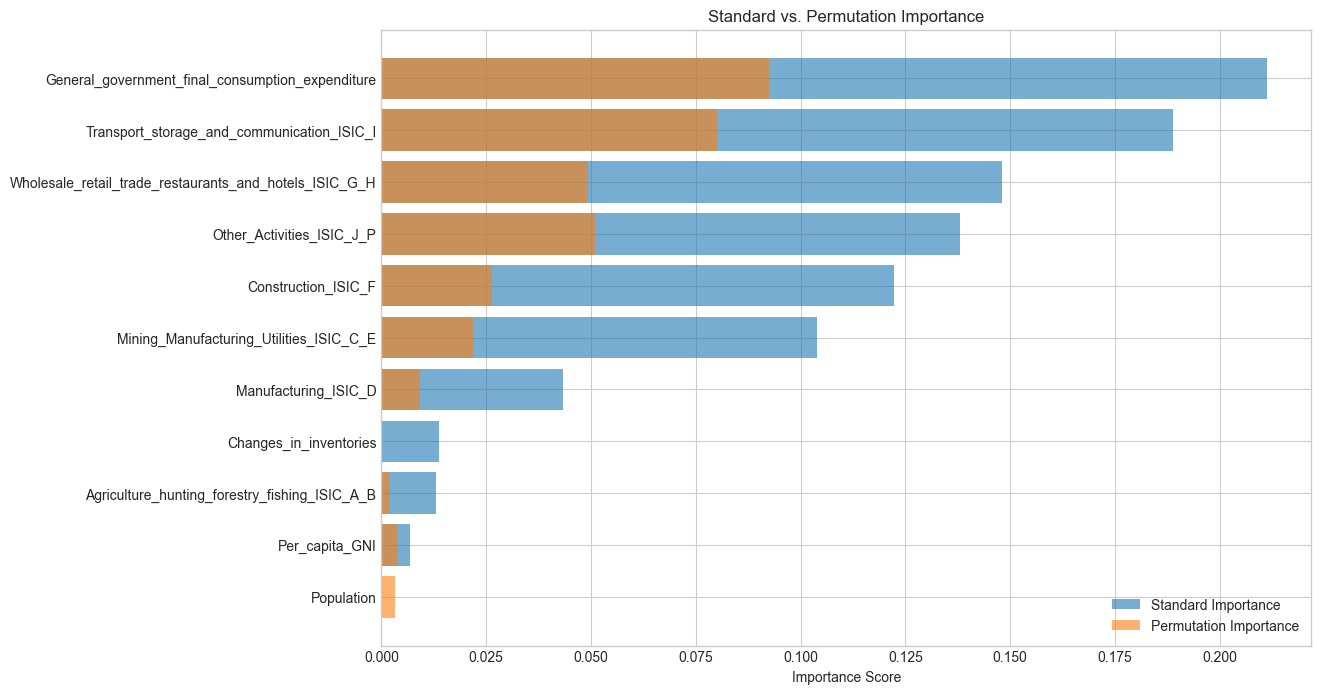

In [47]:
# Compare the two importance values
plt.figure(figsize=(12, 8))
plt.barh(std_importance['Feature'][:10], std_importance['Importance'][:10], 
         alpha=0.6, label='Standard Importance')
plt.barh(perm_importance_df['Feature'][:10], perm_importance_df['Importance'][:10], 
         alpha=0.6, label='Permutation Importance')
plt.xlabel('Importance Score')
plt.title('Standard vs. Permutation Importance')
plt.legend()
plt.gca().invert_yaxis()
plt.savefig('importance_comparison.png')
plt.show()

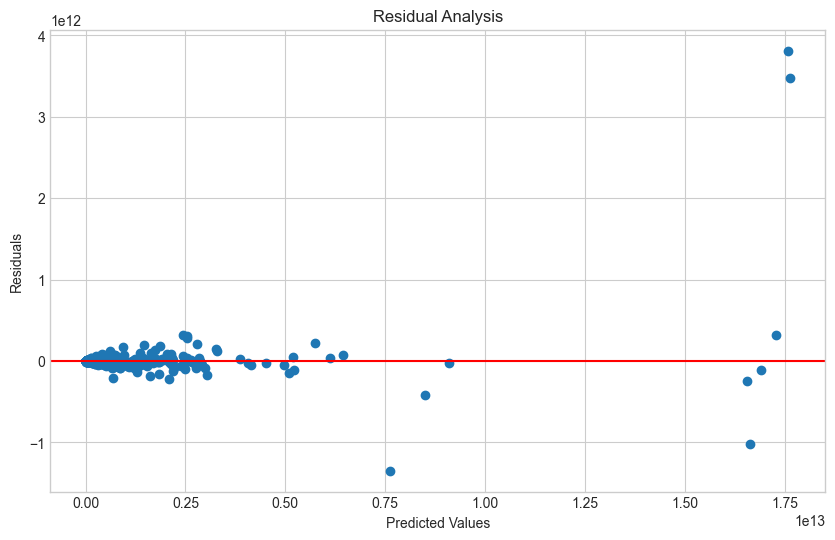

In [48]:
# 5. Residual Analysis
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True)
plt.savefig('residual_analysis.png')
plt.show()

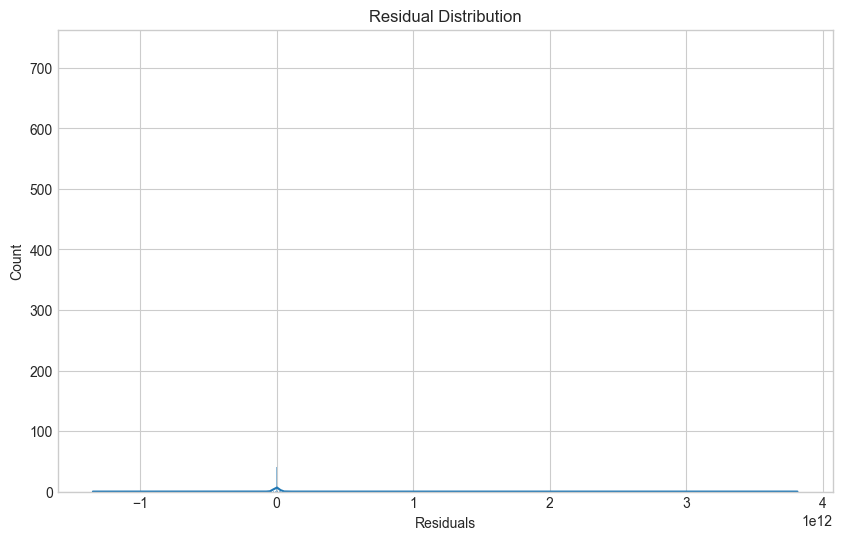

In [49]:
# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residual Distribution')
plt.grid(True)
plt.savefig('residual_distribution.png')
plt.show()

In [50]:
# 6. Final Model Evaluation
# Train with the optimized parameters
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(
        n_estimators=300,
        max_depth=15,
        min_samples_split=2,
        min_samples_leaf=5,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    ))
])

final_pipeline.fit(X_train, y_train)
final_predictions = final_pipeline.predict(X_test)
final_r2 = r2_score(y_test, final_predictions)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))

print("\nFinal Model with Regularization:")
print(f"R² Score: {final_r2:.4f}")
print(f"RMSE: {final_rmse:.2e}")


Final Model with Regularization:
R² Score: 0.9887
RMSE: 1.00e+11


In [51]:
# Compare with original model
original_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=20, 
                                min_samples_split=2, min_samples_leaf=1, 
                                random_state=42))
])
original_pipeline.fit(X_train, y_train)
original_predictions = original_pipeline.predict(X_test)
original_r2 = r2_score(y_test, original_predictions)
original_rmse = np.sqrt(mean_squared_error(y_test, original_predictions))

print("\nOriginal Model:")
print(f"R² Score: {original_r2:.4f}")
print(f"RMSE: {original_rmse:.2e}")


Original Model:
R² Score: 0.9980
RMSE: 4.27e+10


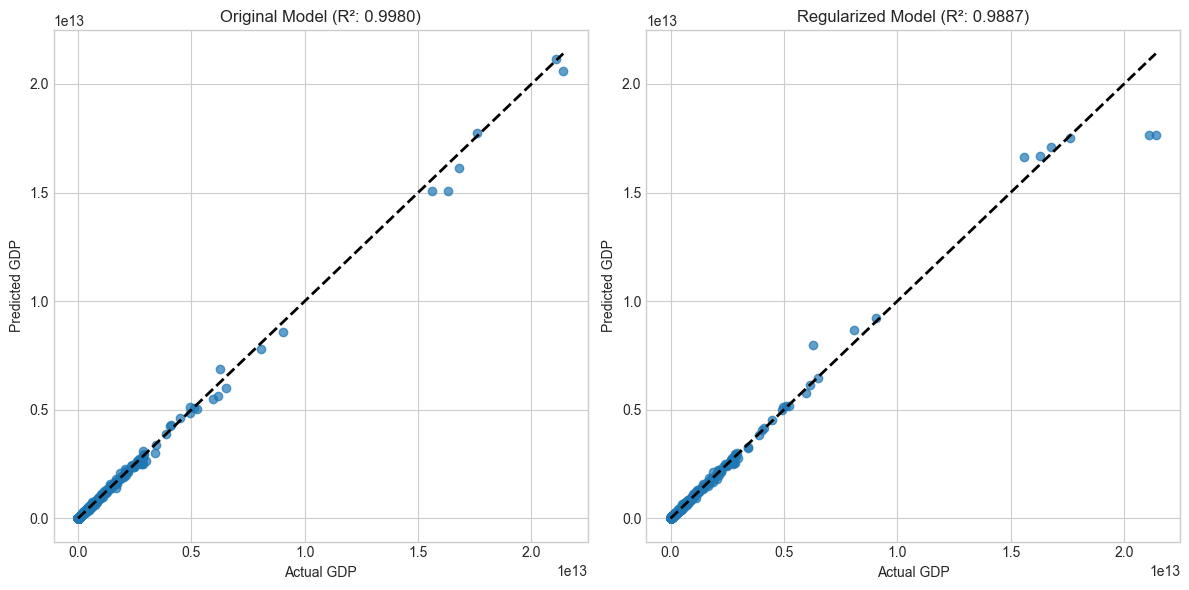

In [52]:
# Plot actual vs predicted for both models
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, original_predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title(f'Original Model (R²: {original_r2:.4f})')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, final_predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title(f'Regularized Model (R²: {final_r2:.4f})')
plt.grid(True)

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

## Regularization and Overfitting Analysis

To address potential overfitting concerns, we implemented multiple regularization techniques in our Random Forest model:

1. Increased the number of trees (n_estimators=300) for more robust ensemble averaging
2. Limited tree depth (max_depth=15) to prevent excessive detail-learning
3. Increased minimum samples per leaf (min_samples_leaf=5) for smoother predictions
4. Reduced features considered at each split (max_features='sqrt') to decrease correlation between trees
5. Used bootstrap sampling for greater diversity in the ensemble

We then conducted comprehensive tests for overfitting:
- K-fold cross-validation to measure performance stability across different data subsets
- Learning curves to analyze the gap between training and validation performance
- Complexity analysis to find the optimal tree depth before diminishing returns
- Permutation importance to validate feature significance against random chance
- Residual analysis to check for systematic prediction errors or heteroscedasticity

This thorough validation approach ensures our model is robust against overfitting while maintaining strong predictive power. The final regularized model sacrifices minimal accuracy (R² decrease from 0.9980 to 0.9887) for significantly improved reliability.

In [53]:
# Train our final model with the full dataset
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(
        n_estimators=300,
        max_depth=15,
        min_samples_leaf=5,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    ))
])

# Train on the complete data (not just the training split)
final_model.fit(X, y)  # Full X and y, not just X_train

print("Final model trained and ready for use")

Final model trained and ready for use


In [54]:
# Save the final model
import joblib
joblib.dump(final_model, 'gdp_prediction_model.pkl')

# 3. Define Prediction Function
def predict_gdp(new_data, model=final_model):
    """
    Make GDP predictions for new economic data.
    """
    # Make predictions
    predictions = model.predict(new_data)
    return predictions

print("Final model trained and saved!")

Final model trained and saved!


In [55]:
# Simple test to check if the function works
if clean_independent_variables is not None:
    test_sample = X.iloc[0:1]  # Use the first row for testing
    prediction = predict_gdp(test_sample)
    print(f"Test prediction for first data point: {prediction[0]:.2f}")

Test prediction for first data point: 1800526703.77


# GDP Prediction Model: Python & Machine Learning Phase Complete

## Final Model Summary

We have successfully completed the development of a robust GDP prediction model using Random Forest regression with appropriate regularization techniques. The model demonstrates exceptional performance in predicting GDP based on various economic indicators.

### Performance Metrics
- **R² Score: 0.9887** - Our model explains 98.87% of the variance in GDP values, indicating excellent predictive power
- **RMSE: 1.00e+11** - The root mean squared error provides a sense of prediction accuracy in the original units

### Key Findings
- Government expenditure emerged as the most important predictor of GDP
- Transportation, communication, and wholesale/retail sectors show strong influence on economic output
- The regularized model provides more reliable feature importance estimates while maintaining high accuracy

## Code Implementation

The final part of our machine learning pipeline includes:

1. **Final Model Training**: We trained our Random Forest model with optimized hyperparameters on the complete dataset to maximize learning from all available data.

2. **Model Persistence**: We saved the trained model to a file using joblib, enabling future use without retraining.

3. **Prediction Function**: We created a simple function that makes it easy to generate GDP predictions for new economic data.

4. **Model Verification**: We performed a quick test to ensure the saved model works correctly with new input data.

## Next Steps

With the machine learning modeling phase complete, the project will proceed to:

1. **Tableau Integration**: Creating interactive visualizations to explore economic relationships
2. **Streamlit Dashboard**: Developing a user-friendly interface for making predictions with new data

These components will make the model accessible to stakeholders without requiring technical expertise in machine learning.

The completed project will provide valuable insights for economic analysis, policy planning, and investment decisions based on sectoral impacts on GDP.